# Imports

In [1]:
from qiskit import QuantumCircuit

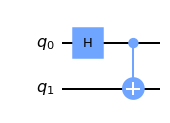

In [3]:
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [5]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

# Enregistrement des informations de connexion

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="38c9bafccc20019506ffa794b1ddde76b4653aa08cfec09108d54f1165738abca2aeec54df77cc9f2cdf964f844f5ee631b0465aded8a75fa1e0d119deb2bcb9", set_as_default=True)

# Load saved credentials
service = QiskitRuntimeService()

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

In [10]:
# !pip install qiskit_ibm_runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
estimator = Estimator(backend, options=options)

# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

runtime_job._start_websocket_client:WARNING:2023-11-10 17:58:54,106: An error occurred while streaming results from the server for job cn6zmkjxhnxg008dkb5g:
Traceback (most recent call last):
  File "c:\users\daoud\appdata\local\programs\python\python39\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 536, in _start_websocket_client
    self._ws_client.job_results()
  File "c:\users\daoud\appdata\local\programs\python\python39\lib\site-packages\qiskit_ibm_provider\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "c:\users\daoud\appdata\local\programs\python\python39\lib\site-packages\qiskit_ibm_provider\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_provider.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "c:\\users\\daoud\\appdata\\local\\program

EstimatorResult(values=array([ 0.02451561, -0.15596998,  0.03021347, -0.15191843,  0.994405  ,
        1.01371819]), metadata=[{'variance': 1.1196051692003077, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.0958795486210424, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.1344982522609202, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.1123318969182805, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.2760115769625315, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.2372283010962399, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

# Analyser les résultats

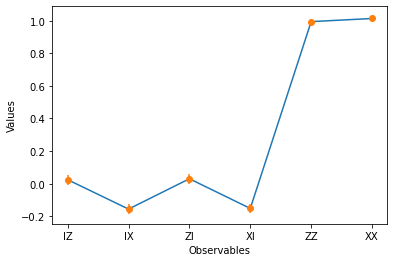

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values

# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))

# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()